# Smartwatch Gestures Dataset Analysis

## Introduction
This notebook provides an advanced analysis of the Smartwatch Gestures dataset, a collection of time-series data used to evaluate gesture recognition algorithms. This dataset includes acceleration data from a 3-axis accelerometer for different arm gestures.

## Dataset Overview
The dataset consists of data collected from eight users performing twenty repetitions of twenty distinct gestures, resulting in 3200 sequences.


In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Dataset Inspection

In [21]:
ds, info = tfds.load('smartwatch_gestures', with_info=True, as_supervised=True)

data = list(tfds.as_numpy(ds['train']))

data = pd.DataFrame(data, columns=['features', 'label'])

info

data.head()


,features,label
0,"{'accel_x': [-0.1532289981842041, -0.306457996...",3
1,"{'accel_x': [3.2178070545196533, 3.37103605270...",15
2,"{'accel_x': [8.274361610412598, 7.967903137207...",19
3,"{'accel_x': [-8.427590370178223, -8.2743616104...",3
4,"{'accel_x': [-2.6048920154571533, -2.298434019...",16


## Data Preprocessing

In [22]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_data.shape, test_data.shape


((2600, 2), (651, 2))

## Exploratory Data Analysis (EDA)
### Visualize Gesture Distributions

<ipython-input-30-7f5175a31096>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gesture_counts.index, y=gesture_counts.values, palette="viridis")


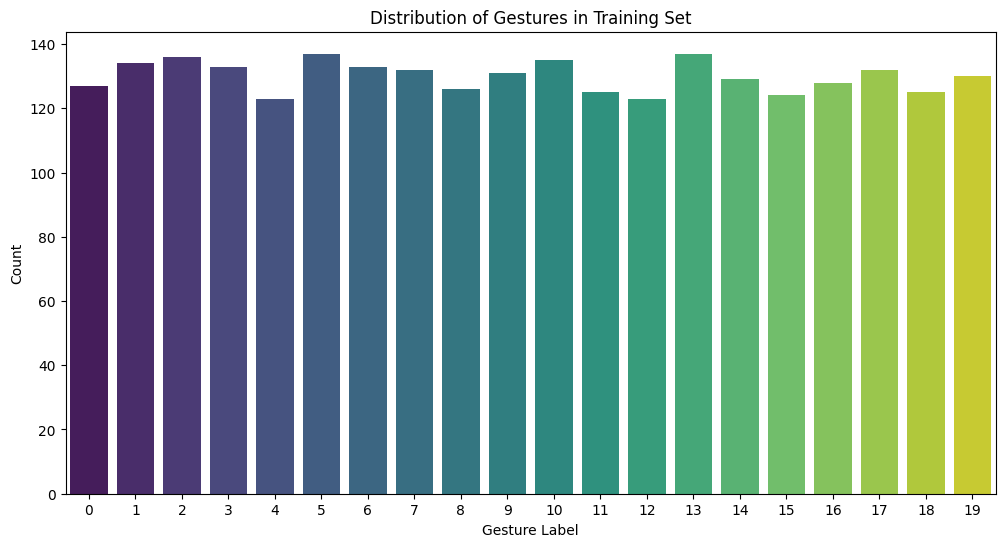

In [30]:
gesture_counts = train_data['label'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=gesture_counts.index, y=gesture_counts.values, palette="viridis")
plt.title('Distribution of Gestures in Training Set')
plt.xlabel('Gesture Label')
plt.ylabel('Count')
plt.show()



### Sample Gesture Visualization

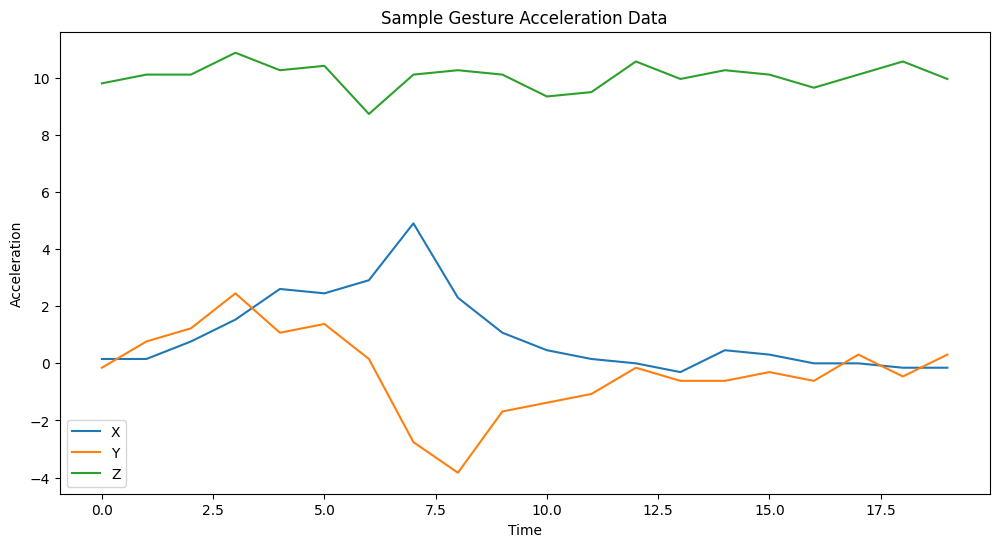

{'accel_x': array([ 0.153229  ,  0.153229  ,  0.76614499,  1.53228903,  2.60489202,
        2.45166302,  2.91134906,  4.90332508,  2.29843402,  1.07260203,
        0.45968699,  0.153229  ,  0.        , -0.306458  ,  0.45968699,
        0.306458  ,  0.        ,  0.        , -0.153229  , -0.153229  ]), 'accel_y': array([-0.153229  ,  0.76614499,  1.22583103,  2.45166302,  1.07260203,
        1.37906003,  0.153229  , -2.75812006, -3.83072305, -1.68551803,
       -1.37906003, -1.07260203, -0.153229  , -0.61291599, -0.61291599,
       -0.306458  , -0.61291599,  0.306458  , -0.45968699,  0.306458  ]), 'accel_z': array([ 9.80665016, 10.11310768, 10.11310768, 10.87925243, 10.26633739,
       10.41956615,  8.73404789, 10.11310768, 10.26633739, 10.11310768,
        9.34696388,  9.50019264, 10.57279491,  9.95987892, 10.26633739,
       10.11310768,  9.6534214 , 10.11310768, 10.57279491,  9.95987892]), 'time_event': array([291561000000, 291671000000, 291781000000, 291891000000,
       292001000000

In [31]:
sample_gesture = train_data[train_data['label'] == 0].iloc[0]
accel_x = sample_gesture['features']['accel_x']
accel_y = sample_gesture['features']['accel_y']
accel_z = sample_gesture['features']['accel_z']

plt.figure(figsize=(12, 6))
plt.plot(accel_x, label='X')
plt.plot(accel_y, label='Y')
plt.plot(accel_z, label='Z')
plt.title('Sample Gesture Acceleration Data')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

sample_gesture = train_data[train_data['label'] == 0].iloc[0]
print(sample_gesture['features'])

## Feature Engineering

In [27]:
def extract_features(data):
    features = []
    for row in data.itertuples(index=False):
        accel_x = row.features['accel_x']
        accel_y = row.features['accel_y']
        accel_z = row.features['accel_z']

        mean_x, std_x, max_x, min_x = np.mean(accel_x), np.std(accel_x), np.max(accel_x), np.min(accel_x)
        mean_y, std_y, max_y, min_y = np.mean(accel_y), np.std(accel_y), np.max(accel_y), np.min(accel_y)
        mean_z, std_z, max_z, min_z = np.mean(accel_z), np.std(accel_z), np.max(accel_z), np.min(accel_z)

        features.append([mean_x, std_x, max_x, min_x, mean_y, std_y, max_y, min_y, mean_z, std_z, max_z, min_z])
    return np.array(features)

X_train = extract_features(train_data)
y_train = train_data['label'].values
X_test = extract_features(test_data)
y_test = test_data['label'].values


## Model Training
### Train a Classifier

In [28]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


### Evaluation

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        33
           1       0.79      0.70      0.75        27
           2       0.94      0.97      0.95        30
           3       0.90      0.85      0.88        33
           4       0.83      0.81      0.82        37
           5       0.74      0.96      0.84        27
           6       0.83      0.71      0.77        28
           7       0.80      0.88      0.84        32
           8       0.86      0.71      0.78        35
           9       0.71      0.82      0.76        33
          10       0.81      0.81      0.81        27
          11       0.82      0.86      0.84        36
          12       0.86      0.79      0.82        38
          13       0.84      0.84      0.84        31
          14       0.81      0.88      0.84        33
          15       0.93      0.76      0.84        37
          16       0.89      0.97      0.93        35
          17       0.93    

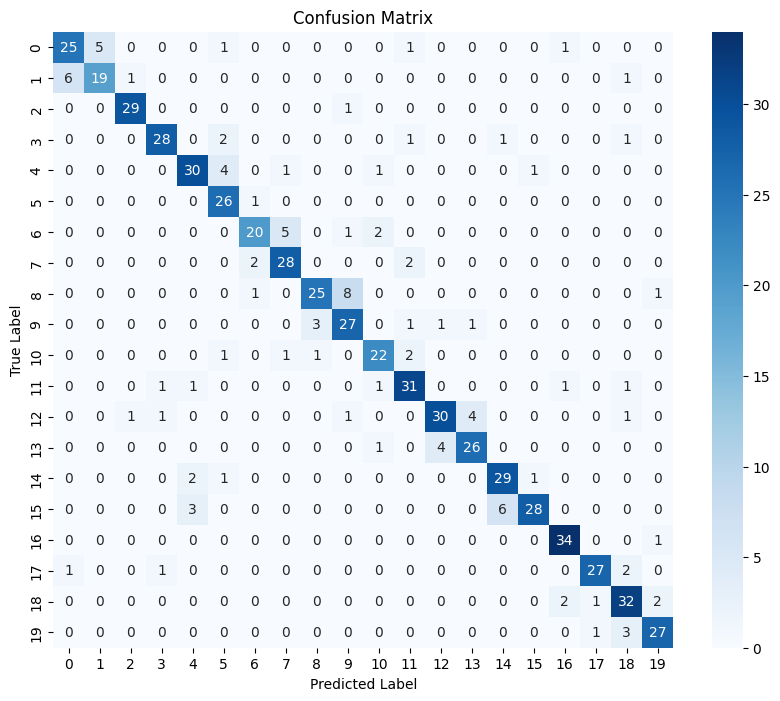

In [29]:
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Conclusion
This notebook provided an advanced-level analysis of the Smartwatch Gestures dataset, including data loading, preprocessing, exploratory data analysis, feature engineering, and model training. Further improvements can be made by experimenting with different models and hyperparameters.
